In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pytesseract
%matplotlib inline

In [2]:
def show(img):
    plt.figure()
    plt.imshow(img, cmap='gray')

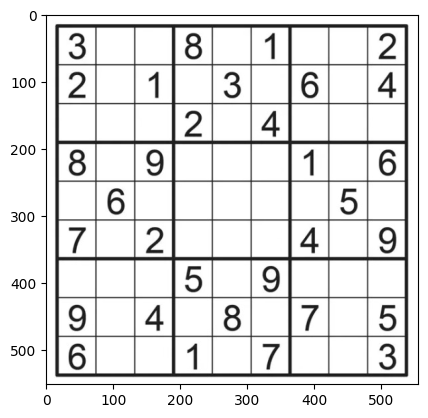

In [3]:
img = cv2.imread('Sudoku1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray)

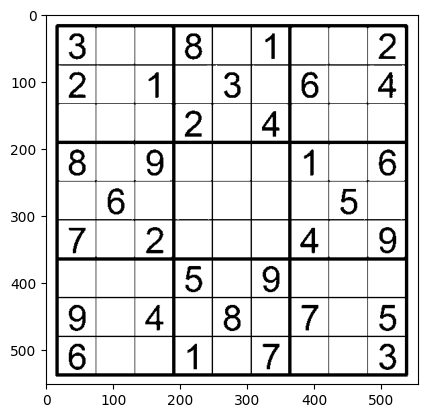

In [4]:
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
show(thresh)

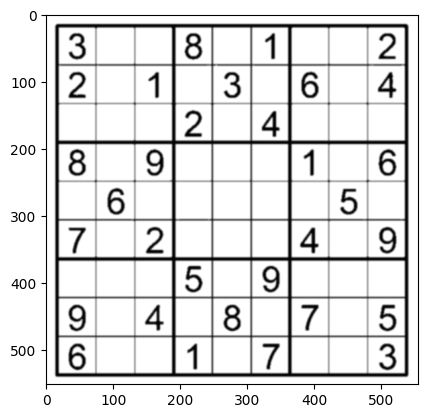

In [5]:
blurred = cv2.GaussianBlur(thresh, (5, 5), 0)
show(blurred)

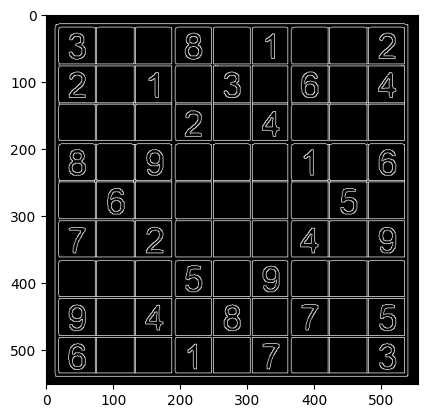

In [6]:
edges = cv2.Canny(blurred, 100, 100)
show(edges)

In [7]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


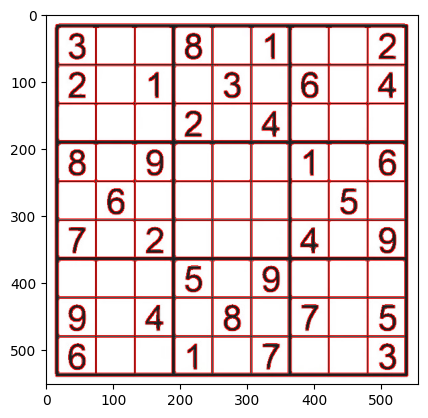

In [8]:
img_copy = np.copy(img)
cv2.drawContours(img_copy, contours, -1, (255, 1, 0), 1)
show(img_copy)

81


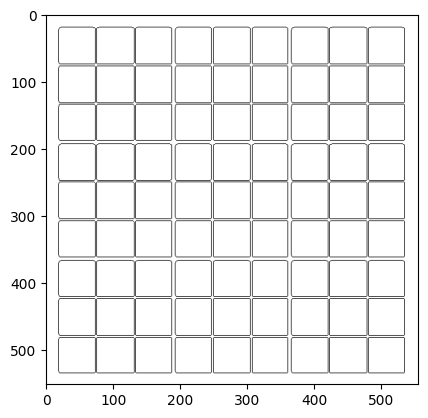

In [9]:
white = np.ones((552, 556), np.uint8) * 255
contours = [cnt for i, cnt in enumerate(contours) if cv2.contourArea(cnt) > 2000 and cv2.contourArea(cnt) < 3500 and hierarchy[0][i][3] > 1]
cv2.drawContours(white, contours, -1, (0, 0, 0,), 1)
show(white)
for cnt in contours:
    white = np.ones((552, 556, 3), np.uint8) * 255
    cv2.drawContours(white, [cnt], -1, (0, 0, 0), 1)
    # show(white)
print(len(contours))

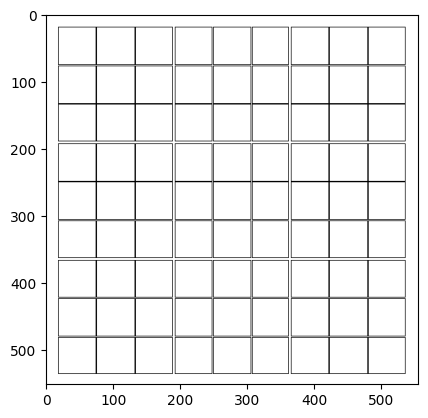

In [10]:
white = np.ones((552, 556), np.uint8) * 255
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(white,(x,y),(x+w,y+h),(),1)
show(white)

In [11]:
ROIs = [cv2.boundingRect(cnt) for cnt in contours]
ROIs = sorted(ROIs, key= lambda roi: list(roi[:2]))
numbers = []
for roi in ROIs:
    x, y, w, h = roi
    num = gray[x:x+w,y:y+h]
    if np.average(num) > 235:
        numbers.append([num, 0])
    else:
        numbers.append([num, 1])

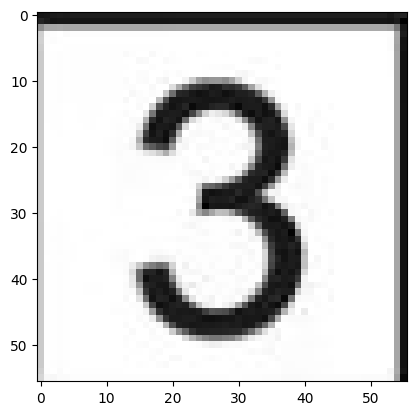

In [12]:
show(numbers[0][0])

0.jpg
1.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg
10.jpg
11.jpg
12.jpg
13.jpg
14.jpg
15.jpg
16.jpg
17.jpg
18.jpg
19.jpg
20.jpg
21.jpg
22.jpg
23.jpg
24.jpg
25.jpg
26.jpg
27.jpg


C:\Users\artha\AppData\Local\Temp\ipykernel_21236\1243565884.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


28.jpg
29.jpg
30.jpg
31.jpg
32.jpg
33.jpg
34.jpg
35.jpg
36.jpg
37.jpg
38.jpg
39.jpg
40.jpg
41.jpg
42.jpg
43.jpg
44.jpg
45.jpg
46.jpg
47.jpg
48.jpg
49.jpg
50.jpg
51.jpg
52.jpg
53.jpg
54.jpg
55.jpg
56.jpg
57.jpg
58.jpg
59.jpg
60.jpg
61.jpg
62.jpg
63.jpg
64.jpg
65.jpg
66.jpg
67.jpg
68.jpg
69.jpg
70.jpg
71.jpg
72.jpg
73.jpg
74.jpg
75.jpg
76.jpg
77.jpg
78.jpg
79.jpg
80.jpg


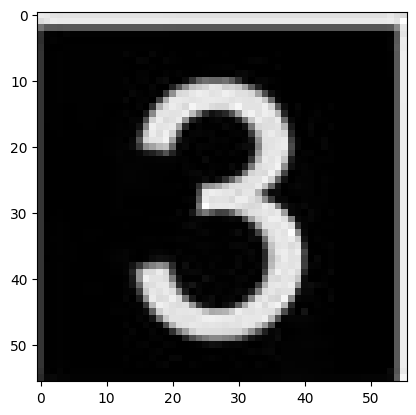

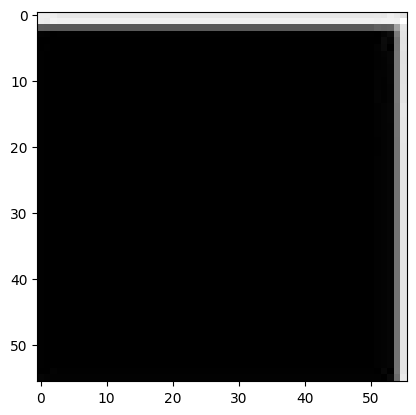

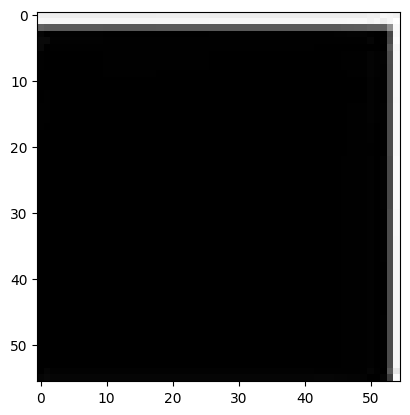

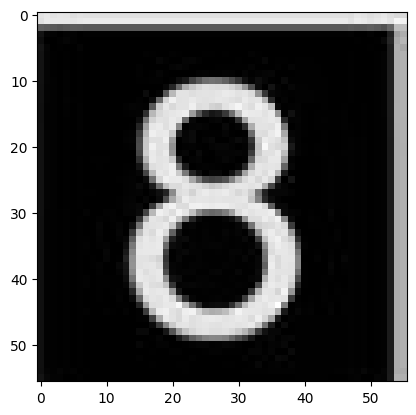

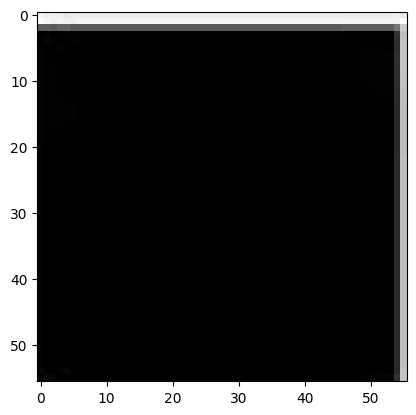

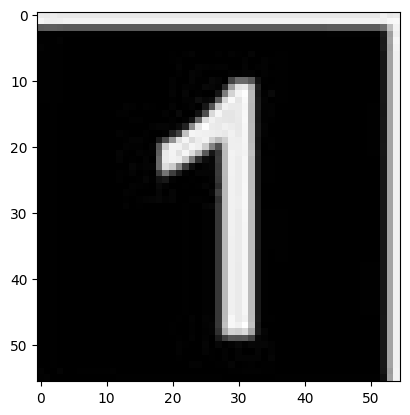

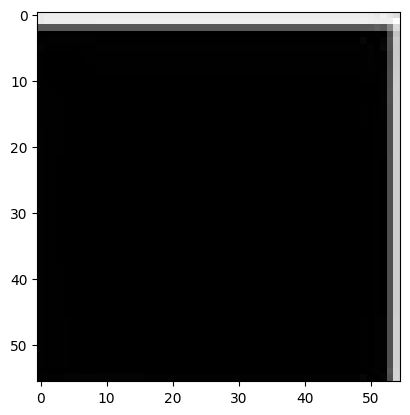

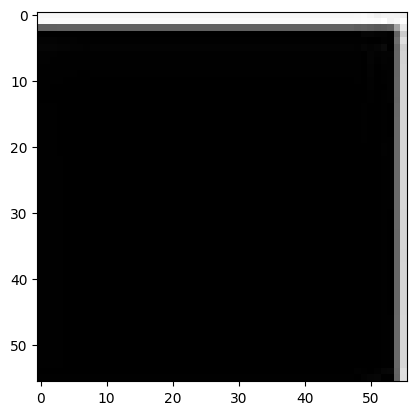

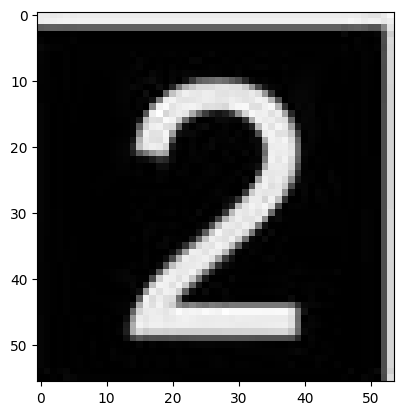

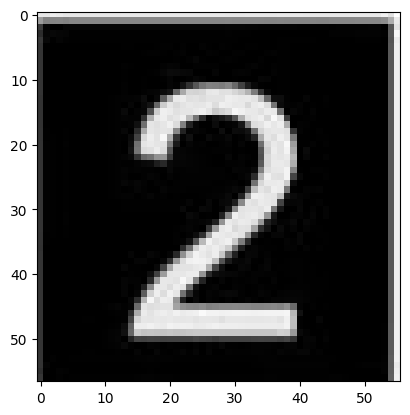

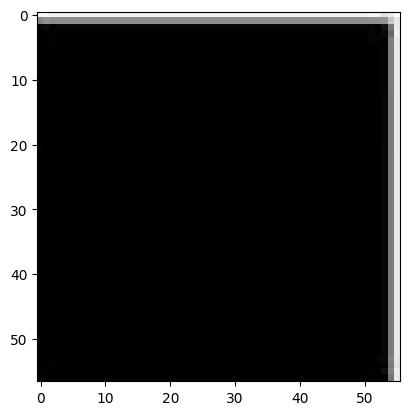

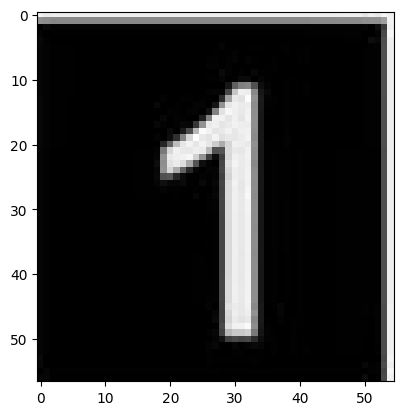

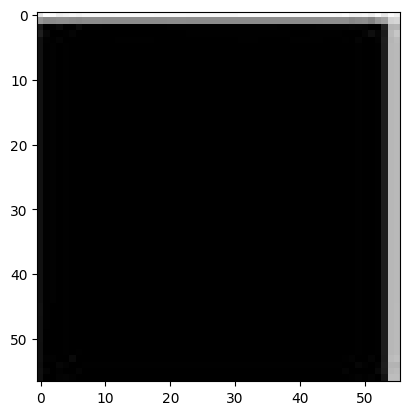

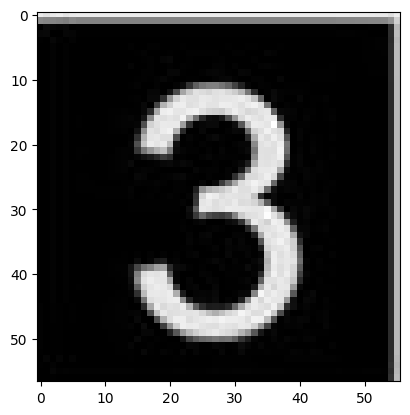

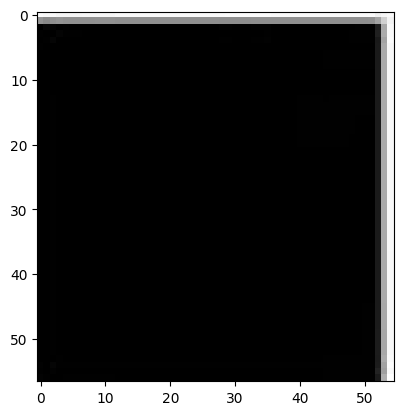

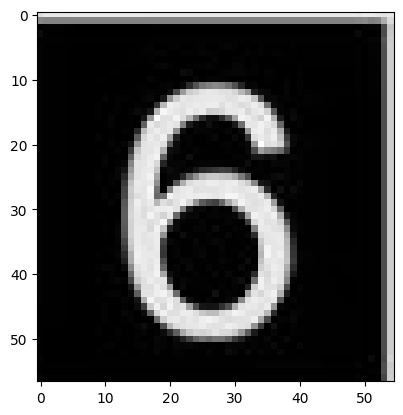

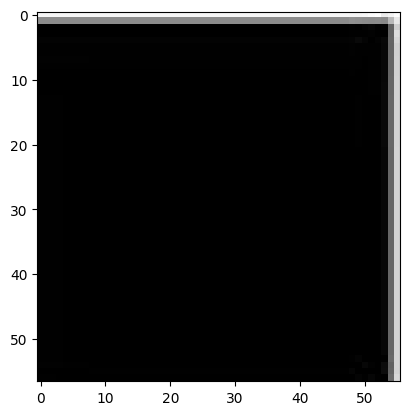

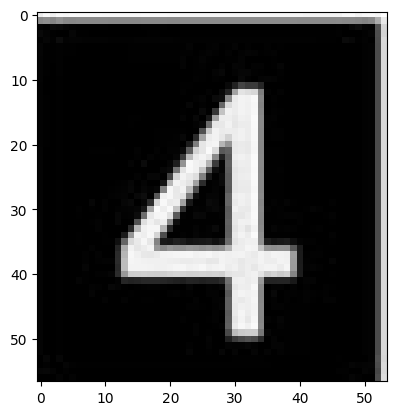

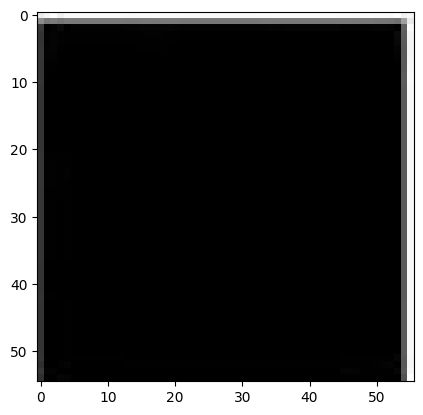

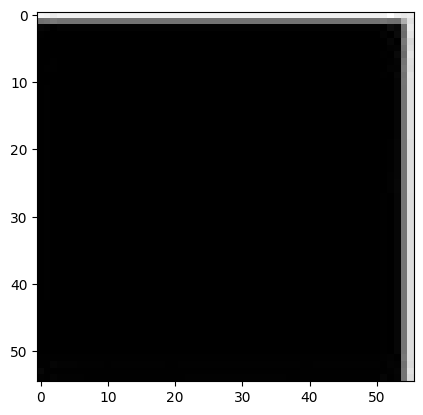

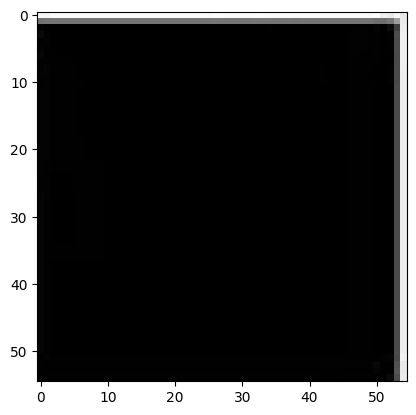

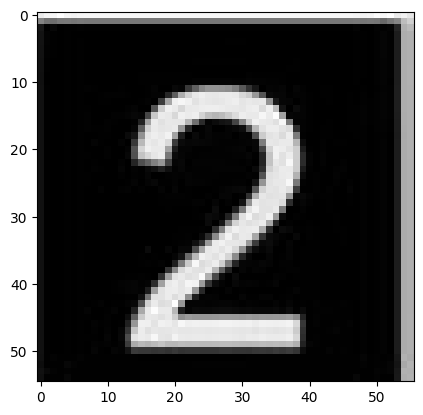

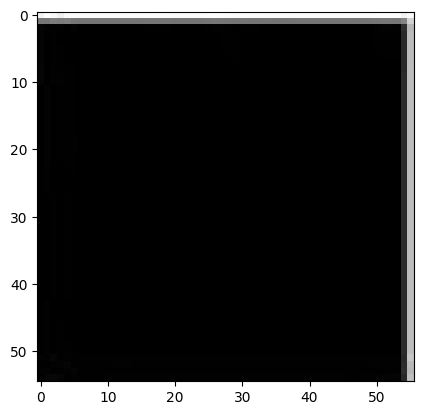

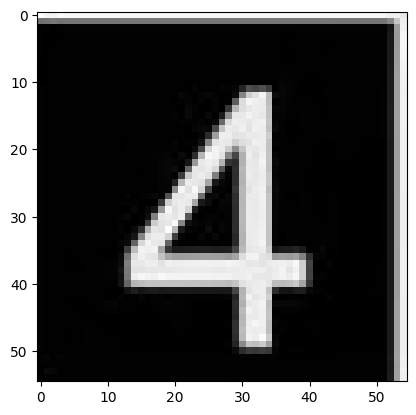

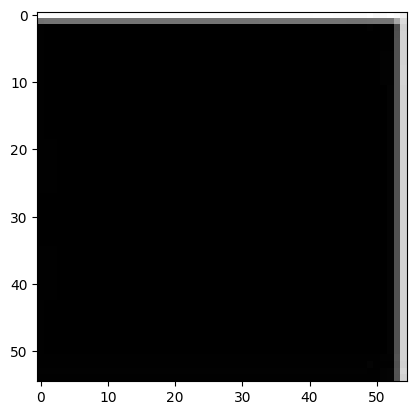

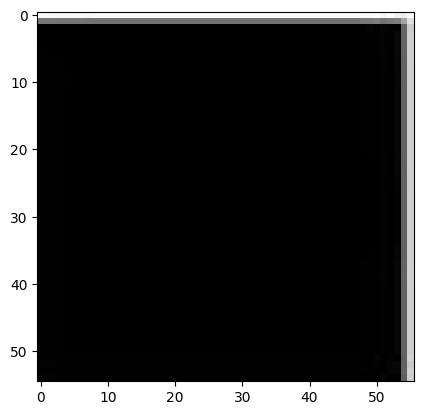

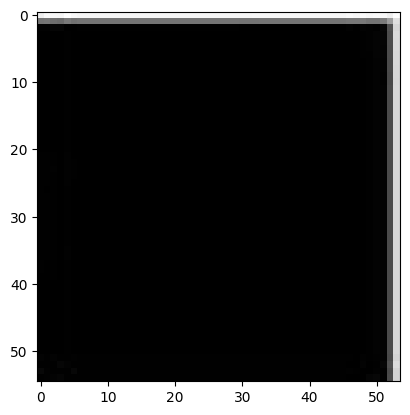

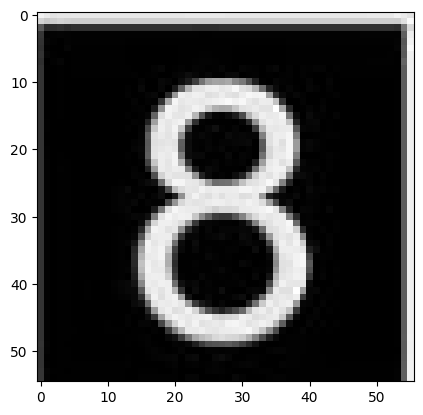

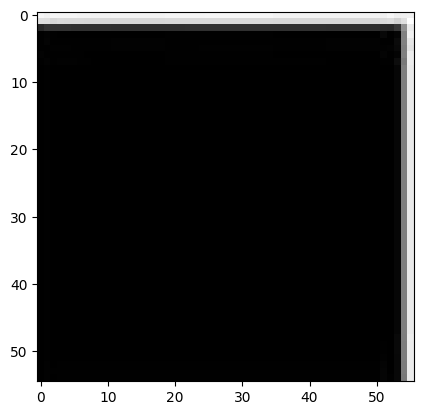

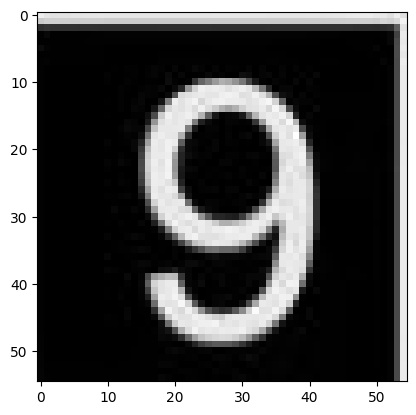

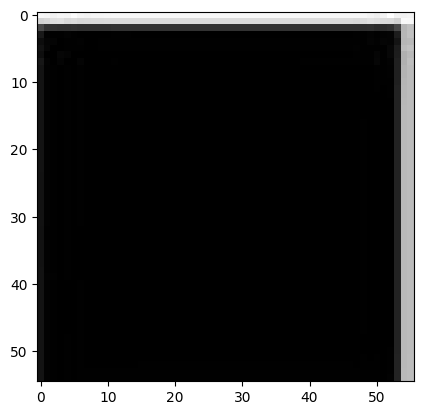

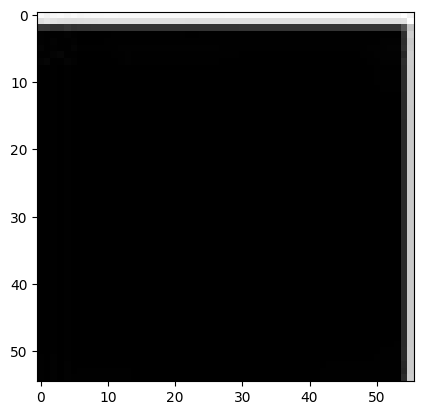

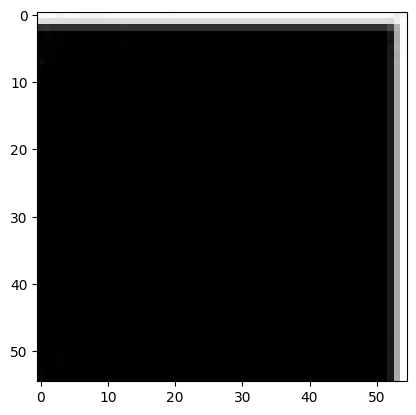

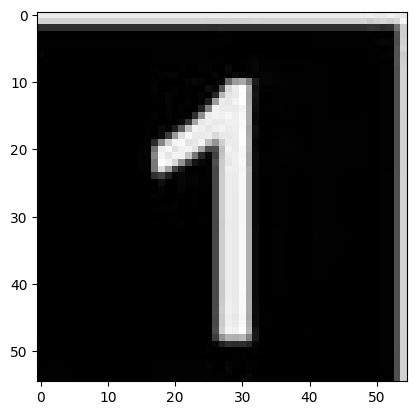

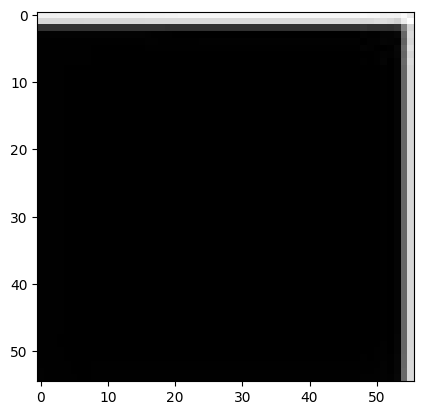

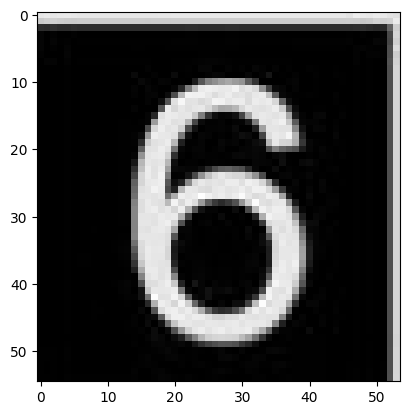

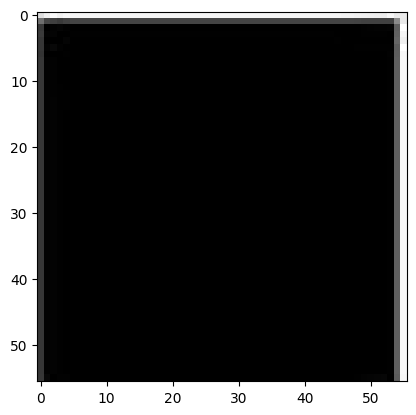

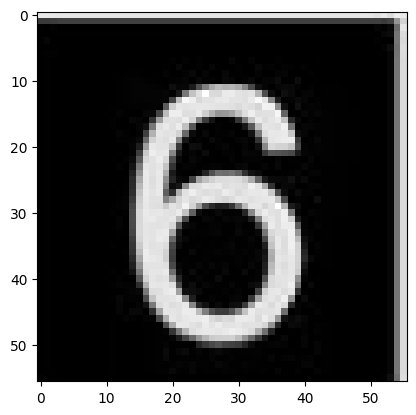

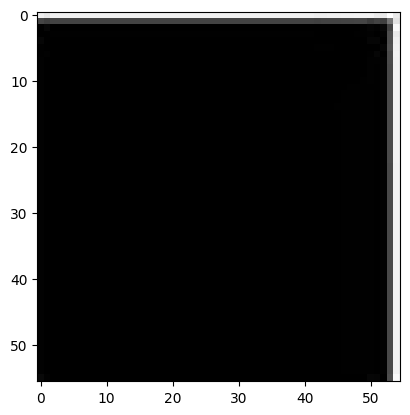

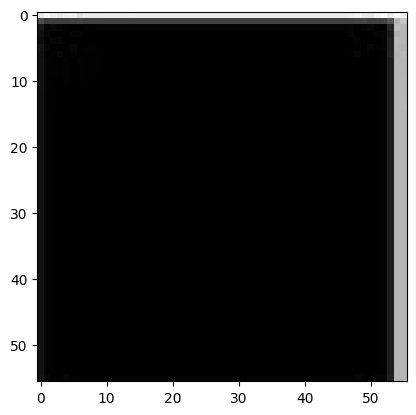

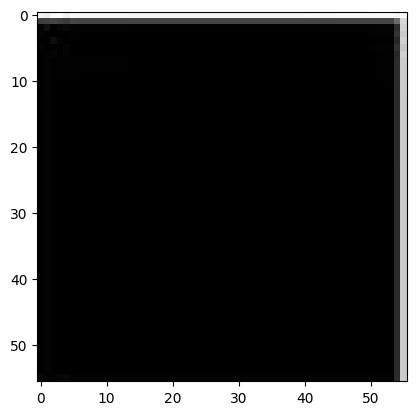

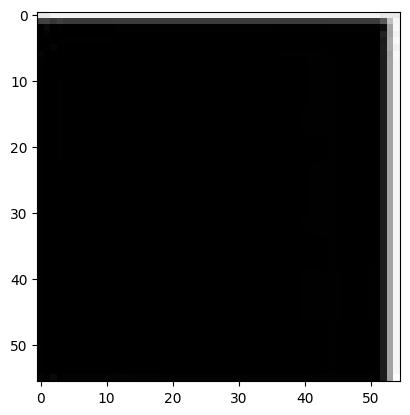

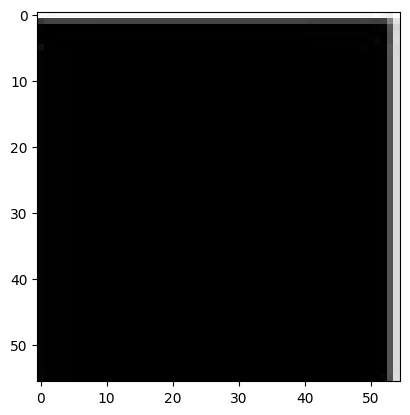

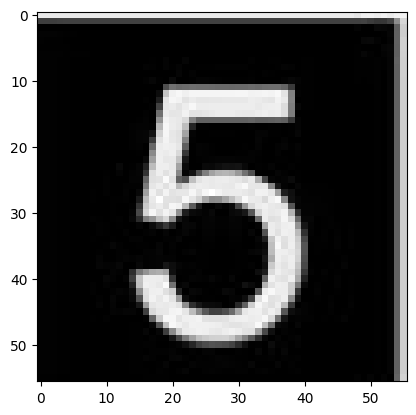

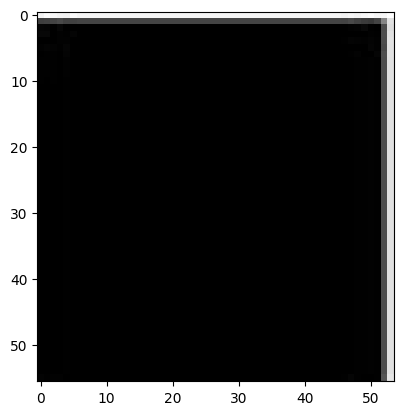

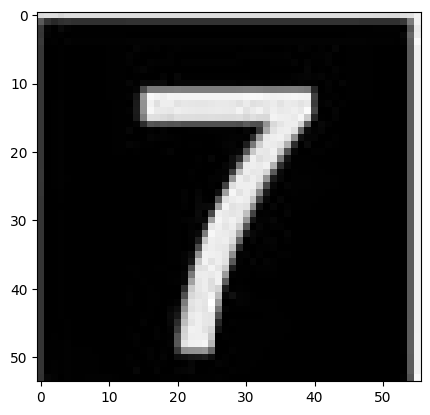

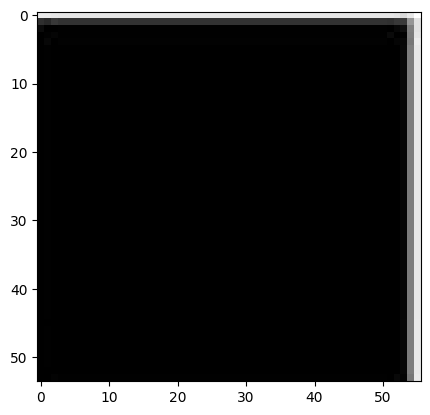

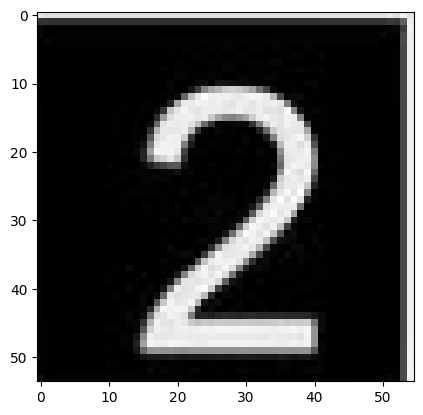

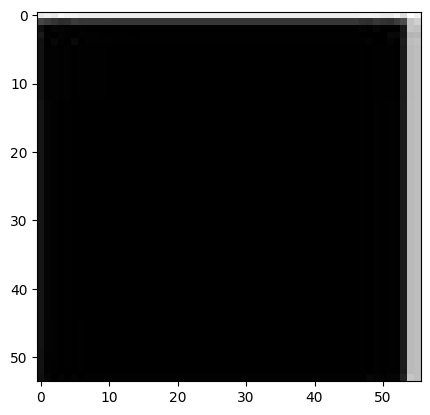

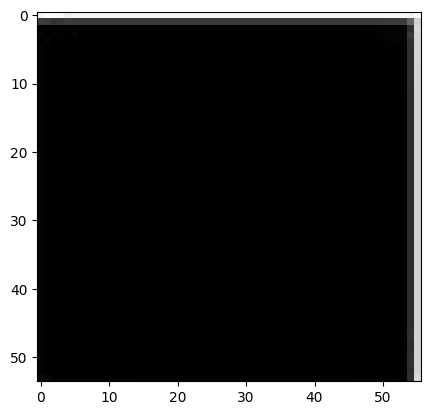

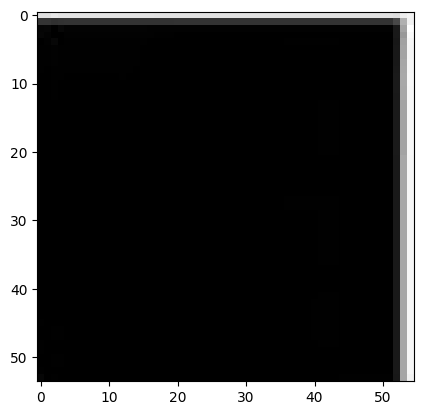

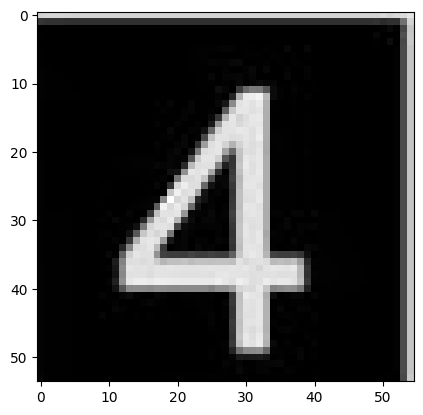

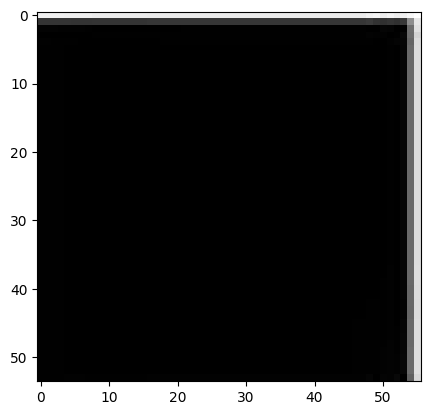

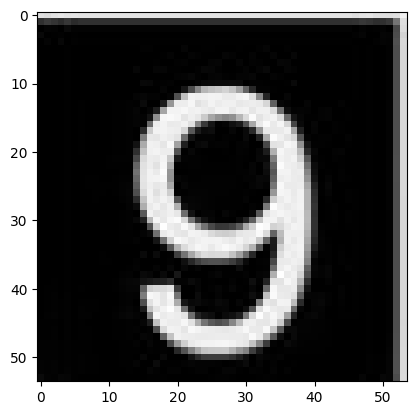

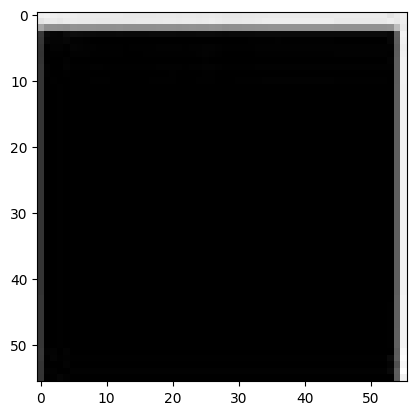

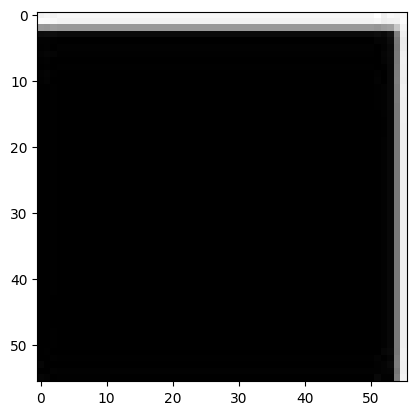

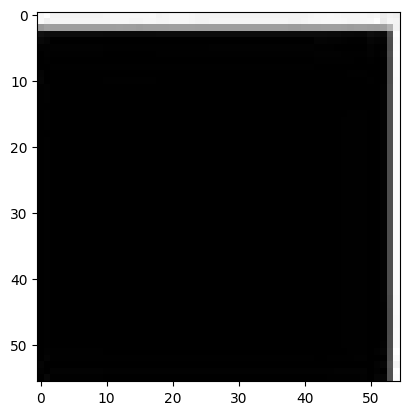

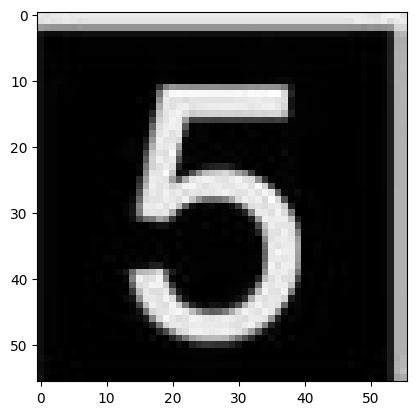

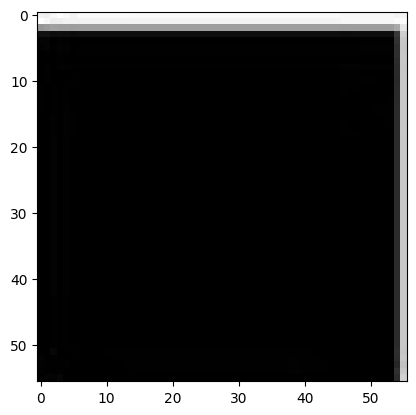

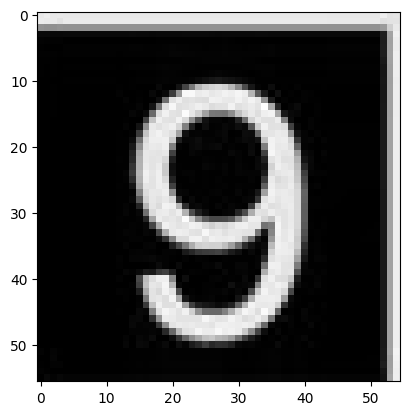

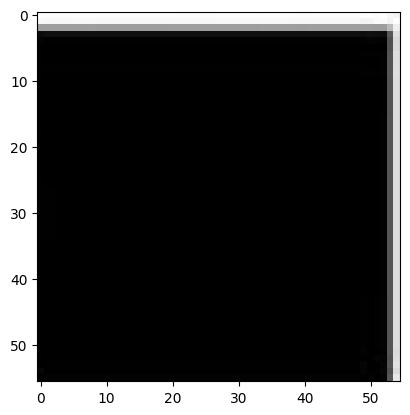

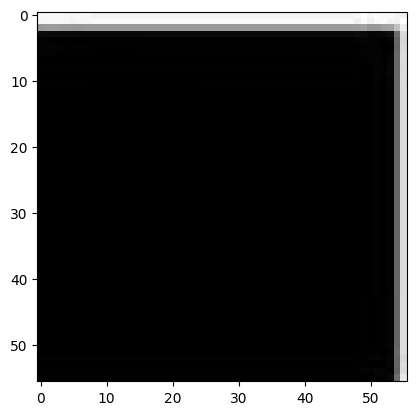

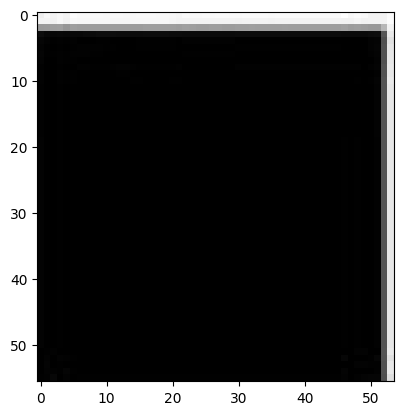

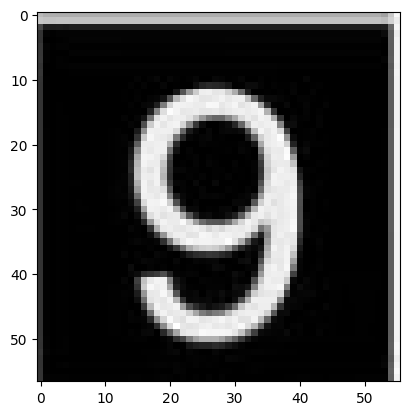

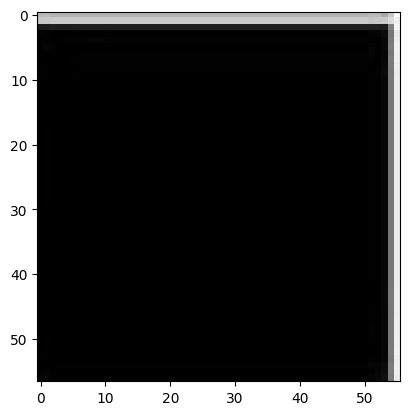

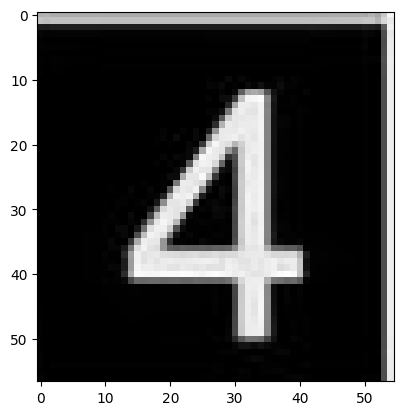

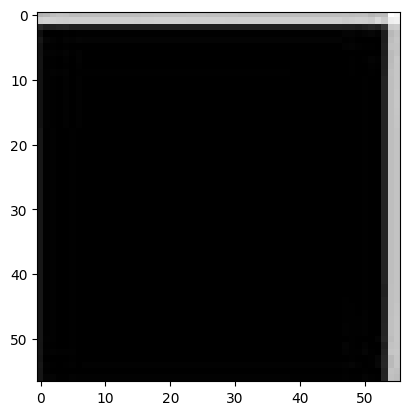

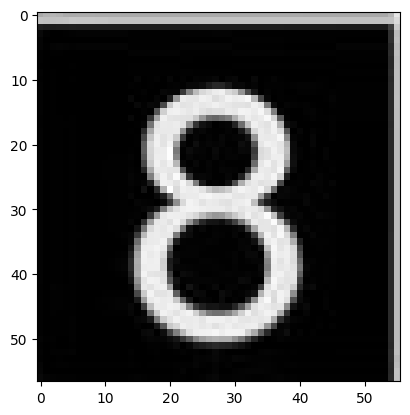

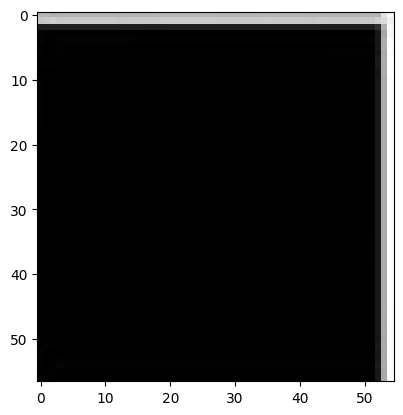

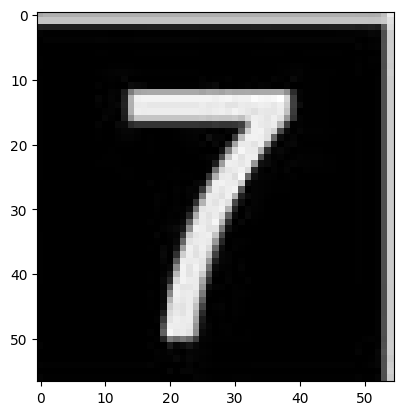

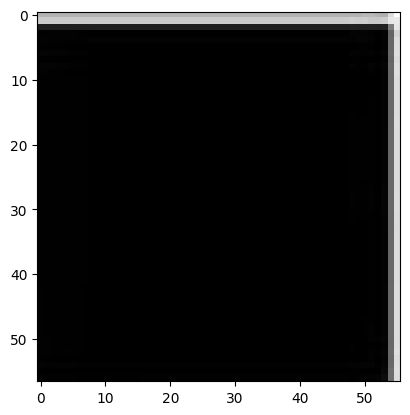

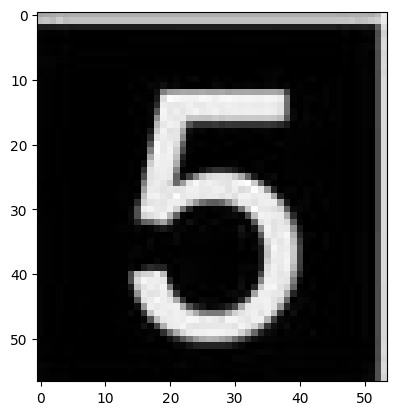

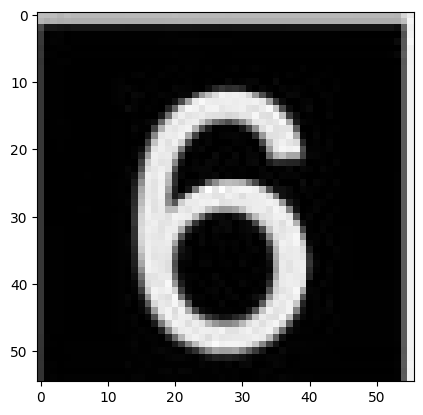

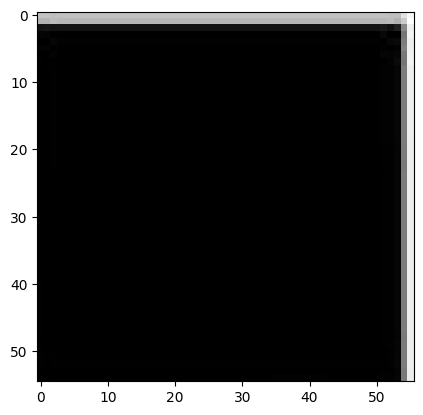

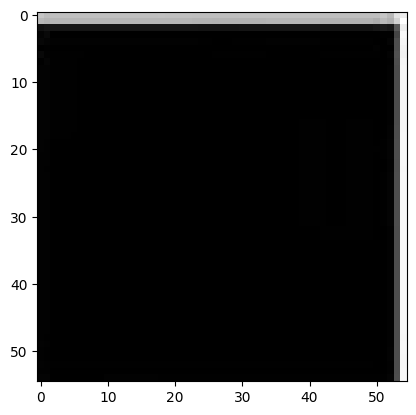

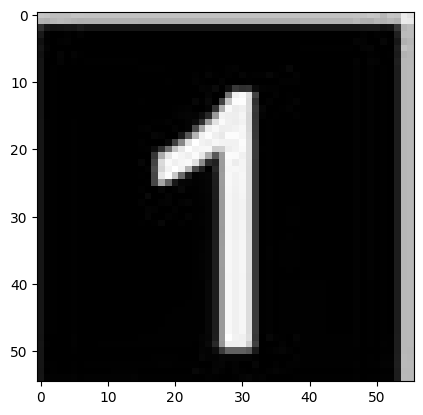

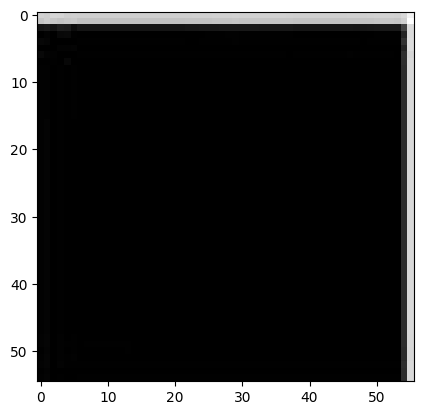

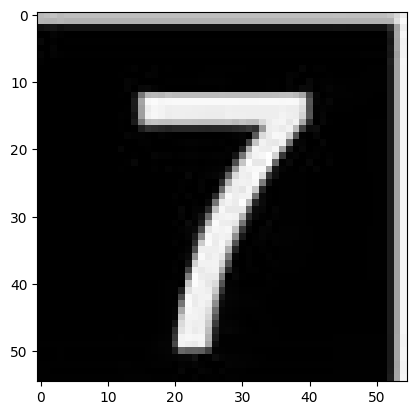

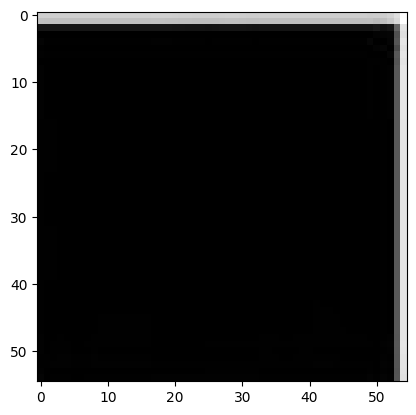

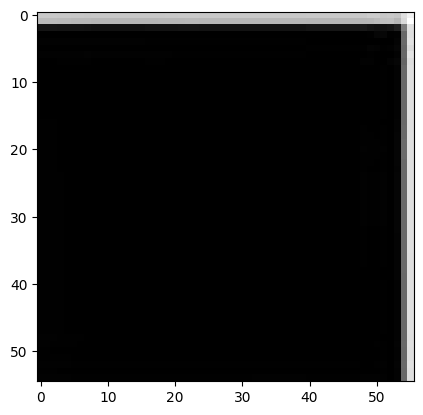

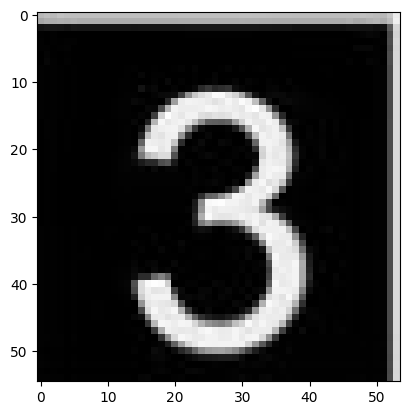

In [21]:
# sudoku_imgs = []
# count = 0
# for i in range(9):
#     sudoku_imgs.append(numbers[9*i:9*(i+1)])
for i in range(len(numbers)):
    img = numbers[i][0]
    img = ~img
    filename = str(i) + ".jpg"
    print(filename)
    cv2.imwrite(filename, img)
    show(img)

In [ ]:
# def boundary(number):
#     number = cv2.resize(number, (100, 100))
#     num_rgb = cv2.cvtColor(number, cv2.COLOR_GRAY2RGB)
#     show(number)
#     ret, thresh = cv2.threshold(number, 100, 255, cv2.THRESH_BINARY)
#     show(thresh)
#     contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
#     # max_cnt = max(contours, key= cv2.contourArea)
#     cv2.drawContours(num_rgb, contours, 1, (255, 20, 20), 1)
#     rf = 1.2
#     x, y, w, h = cv2.boundingRect(contours[1])
#     nw, nh = int(w*rf), int(h*rf)
#     nx = x - (nw - w)//2
#     ny = y - (nh - h)//2
#     cv2.rectangle(num_rgb, (x, y), (x+w, y+h), (0, 255, 255), 1)
#     cv2.rectangle(num_rgb, (nx, ny), (nx+nw, ny+nh), (0, 255, 255), 1)
#     show(num_rgb)

C:\Users\artha\AppData\Local\Temp\ipykernel_9572\1243565884.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


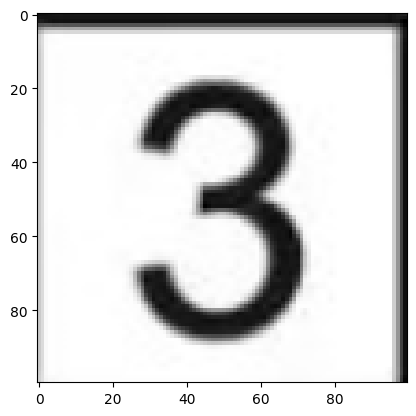

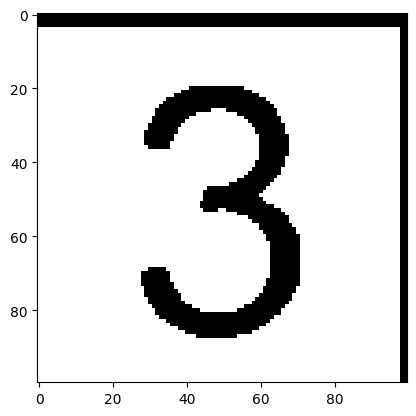

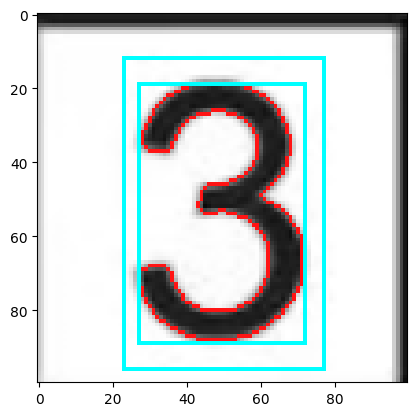

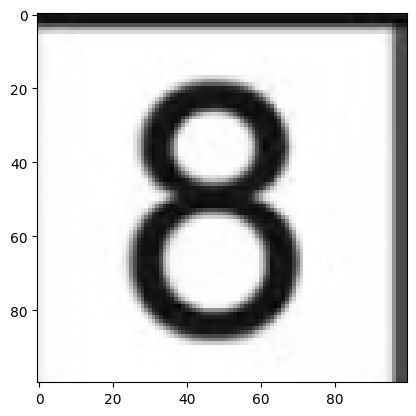

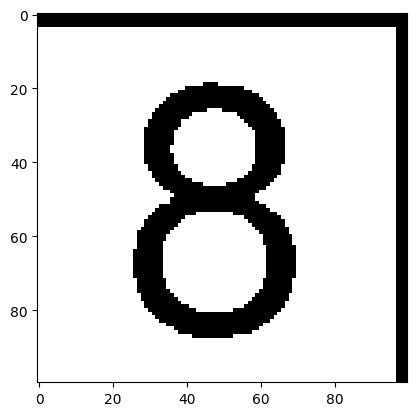

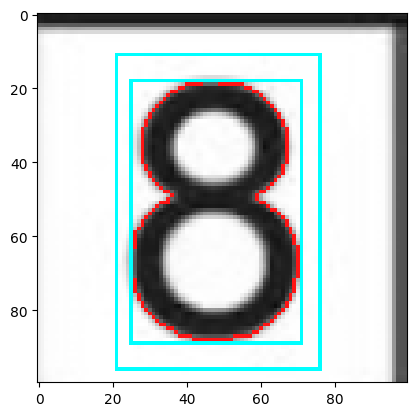

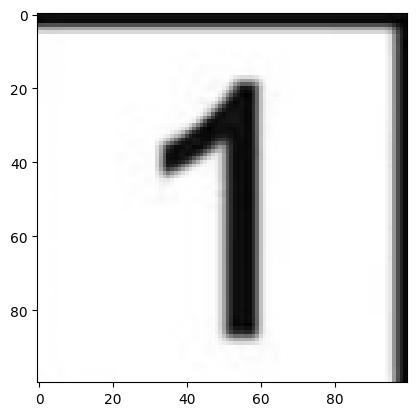

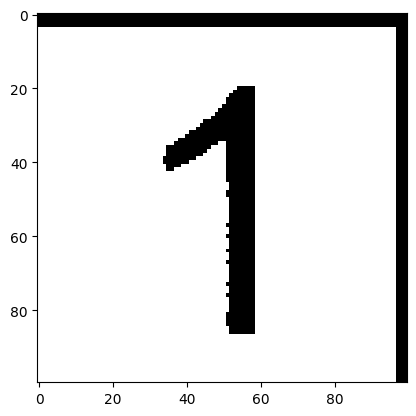

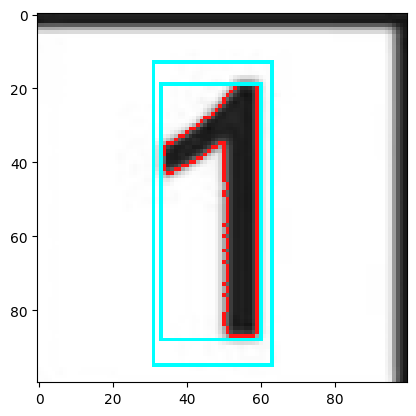

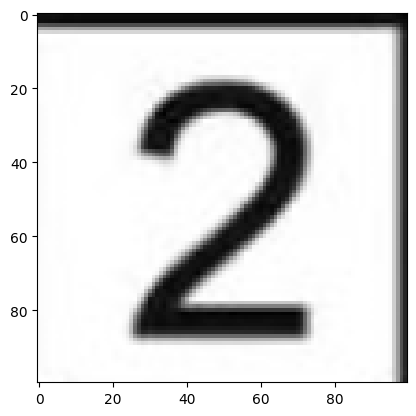

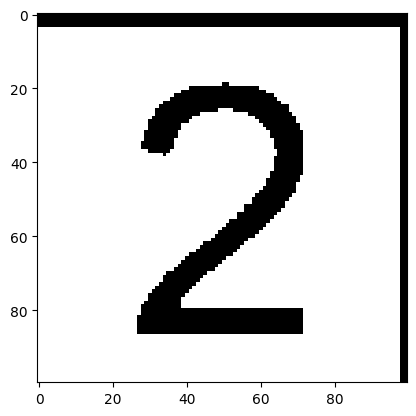

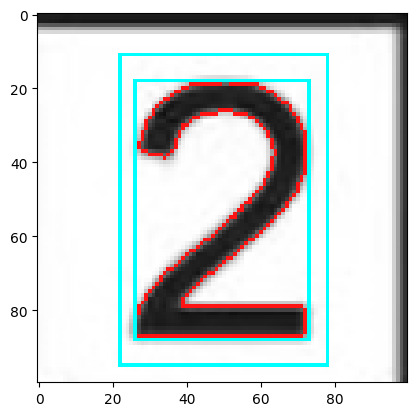

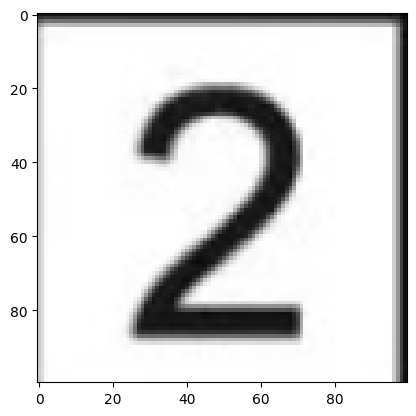

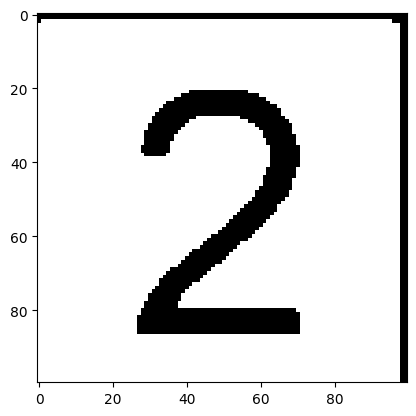

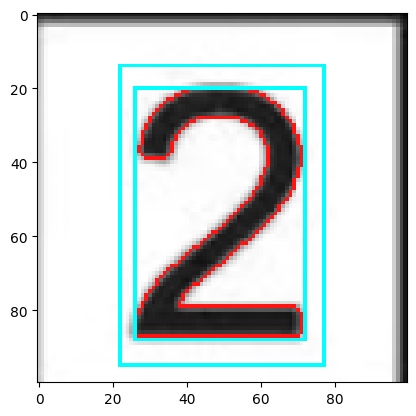

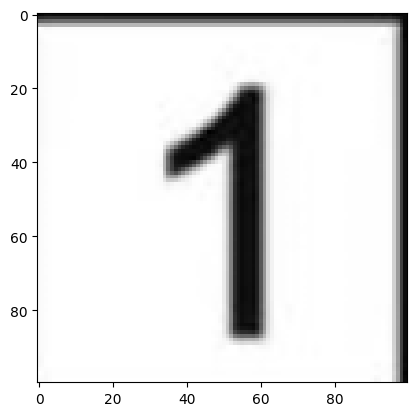

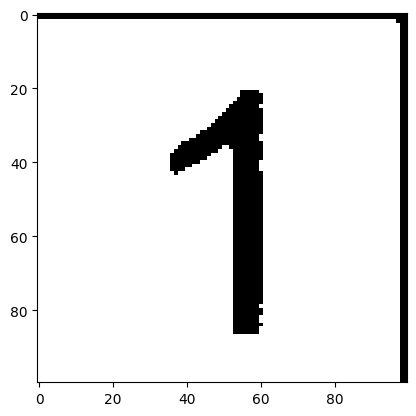

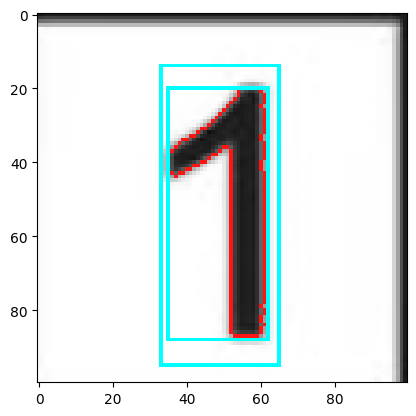

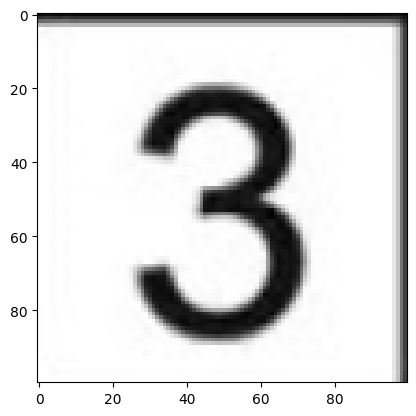

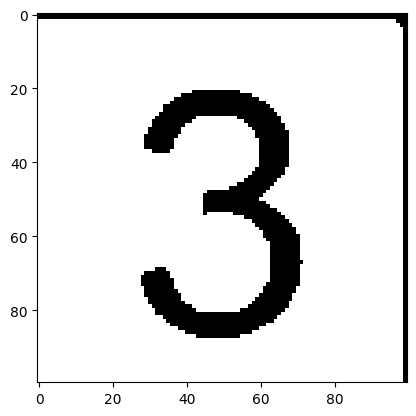

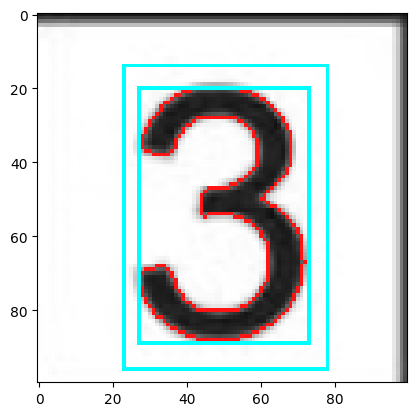

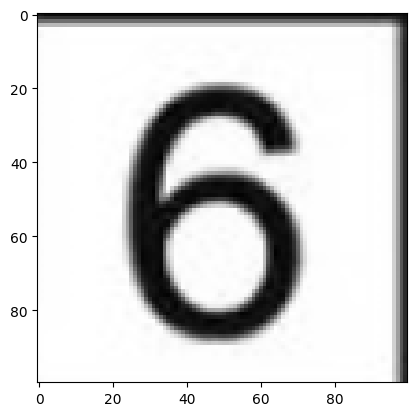

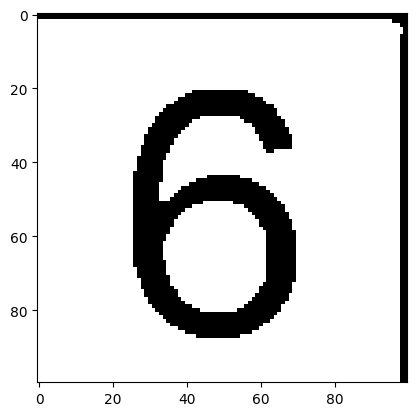

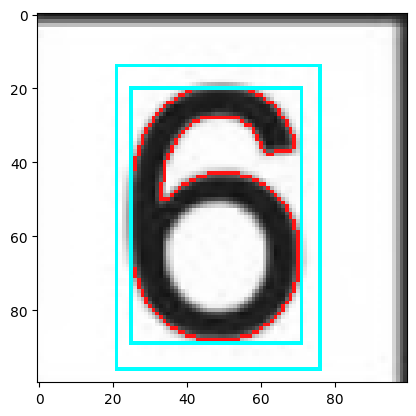

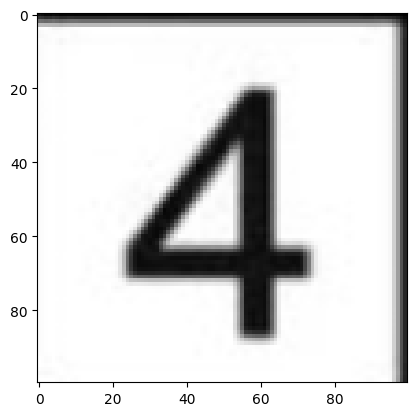

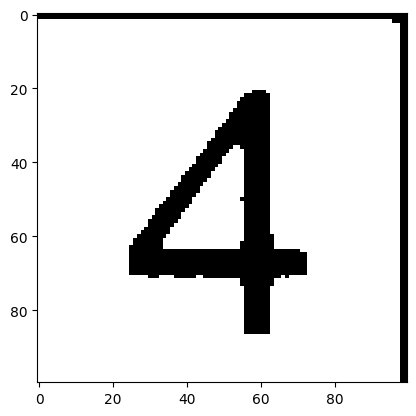

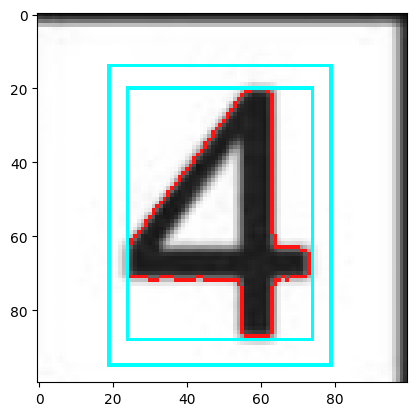

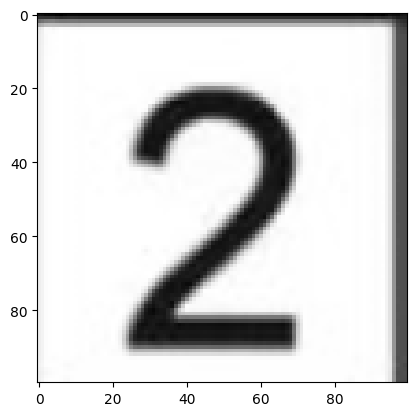

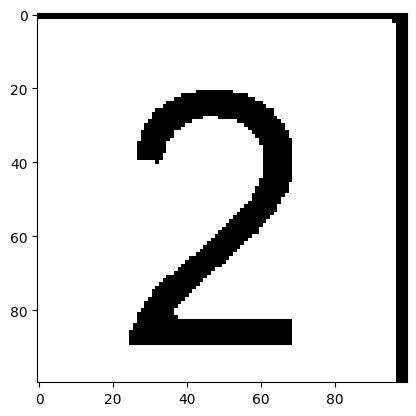

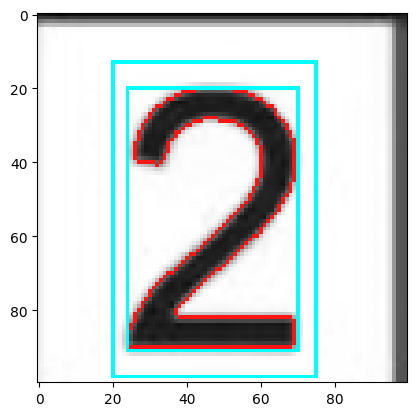

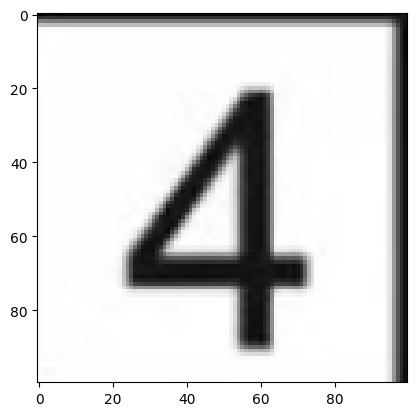

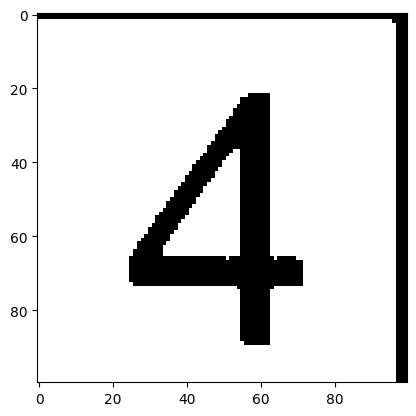

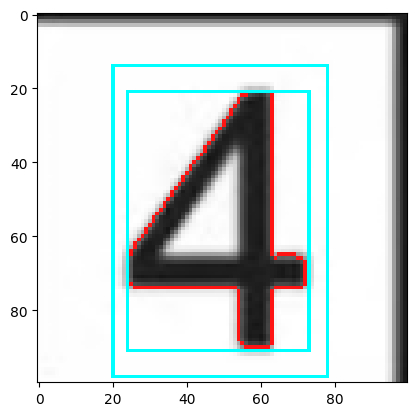

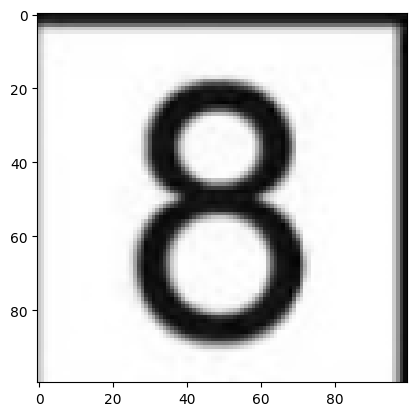

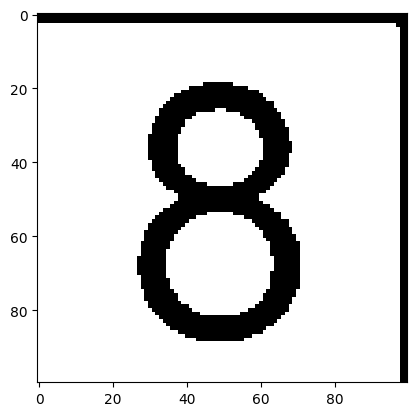

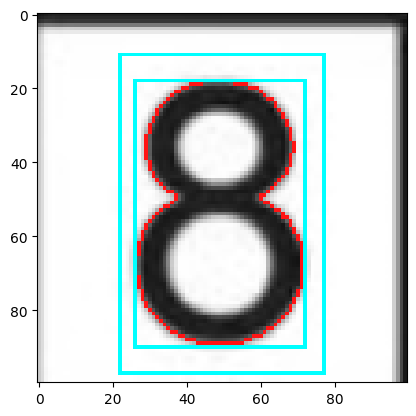

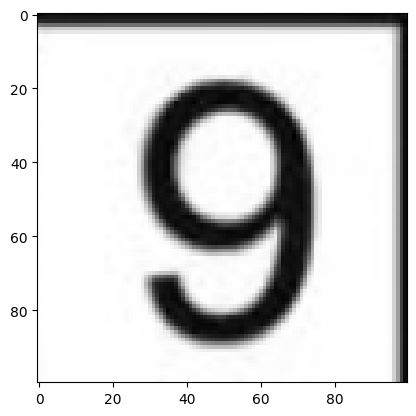

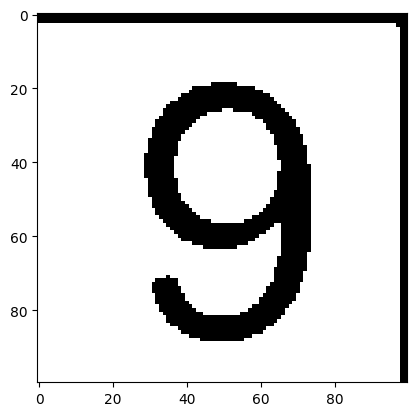

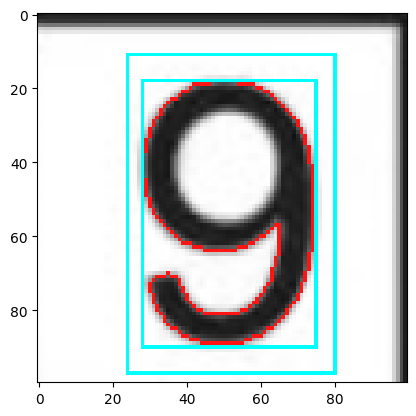

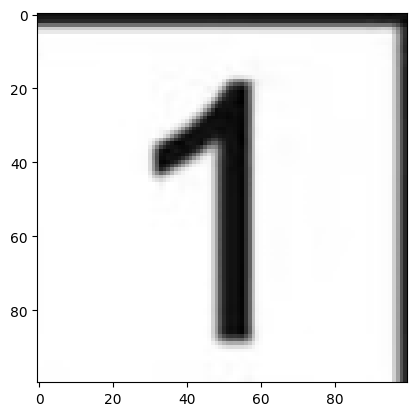

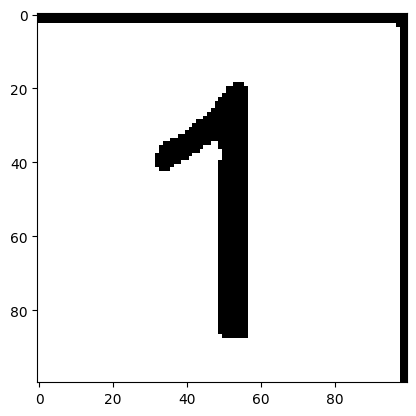

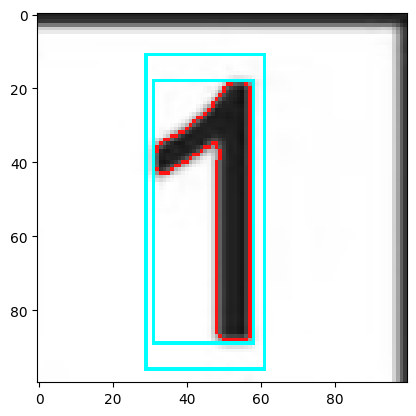

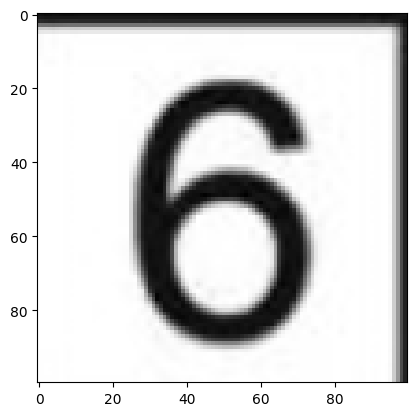

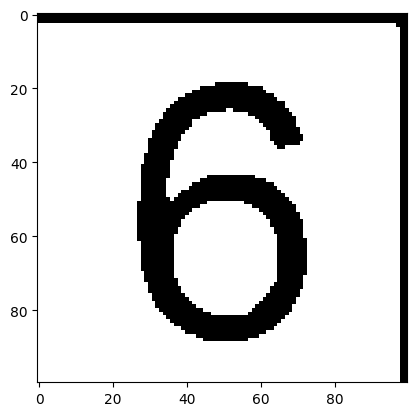

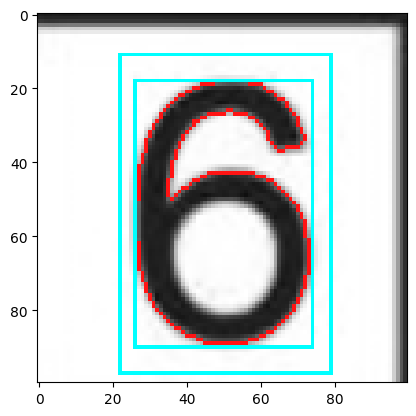

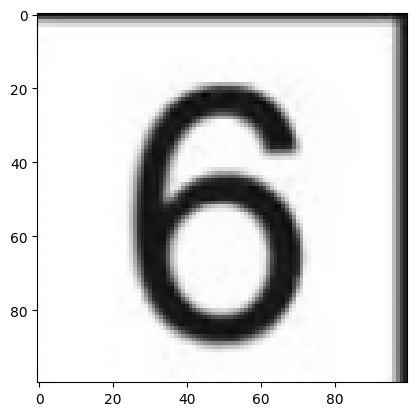

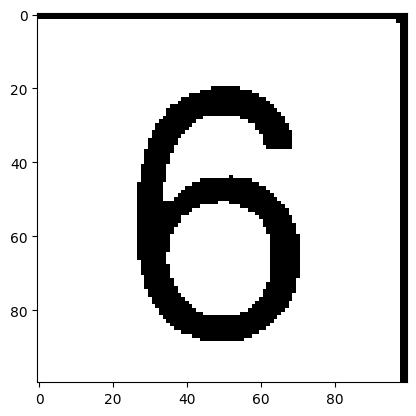

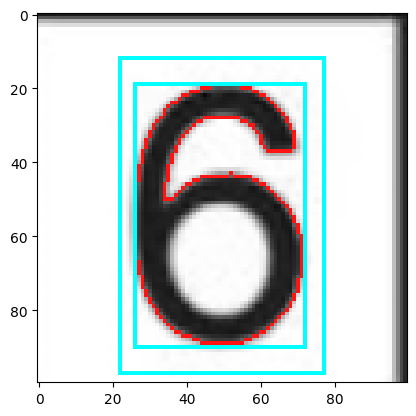

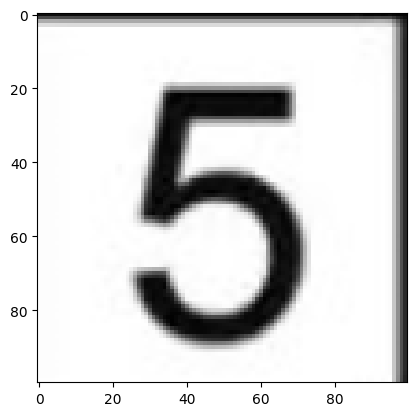

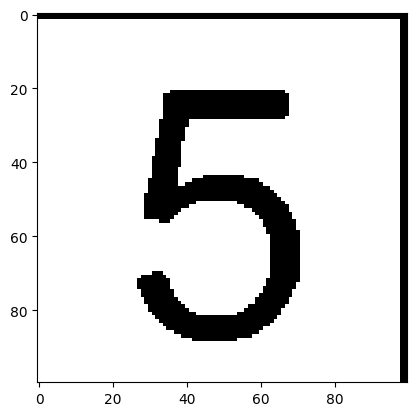

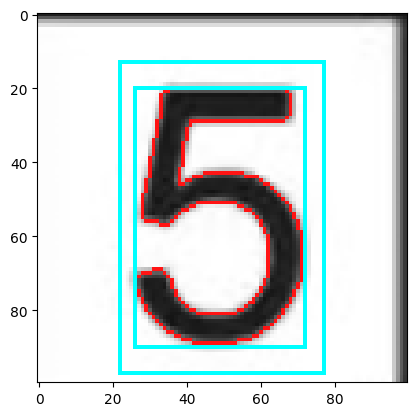

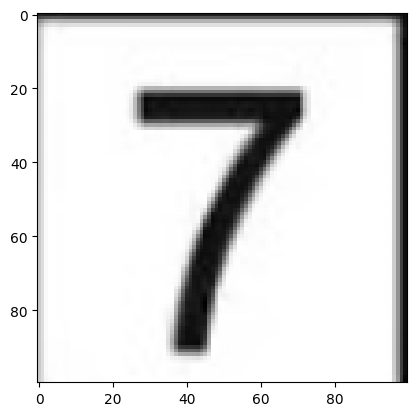

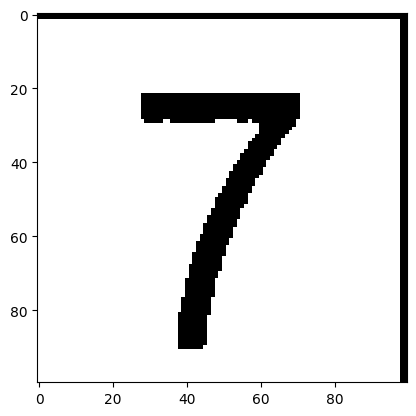

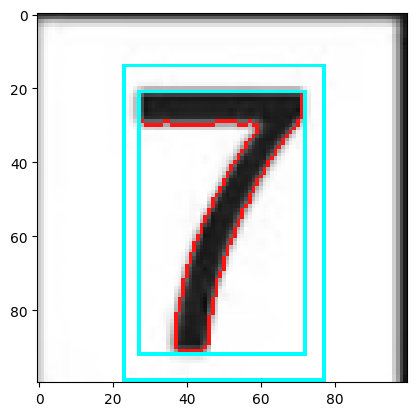

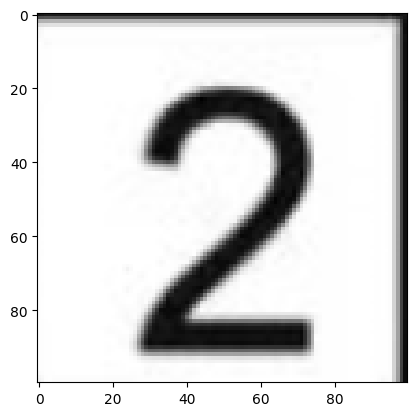

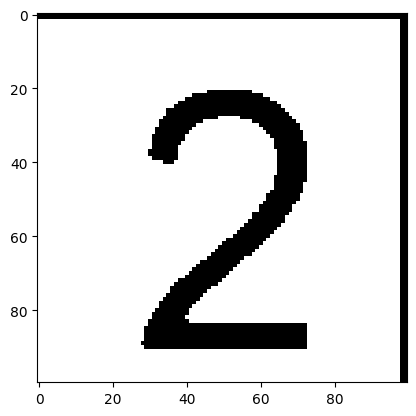

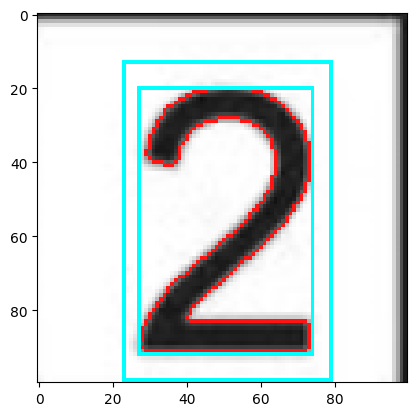

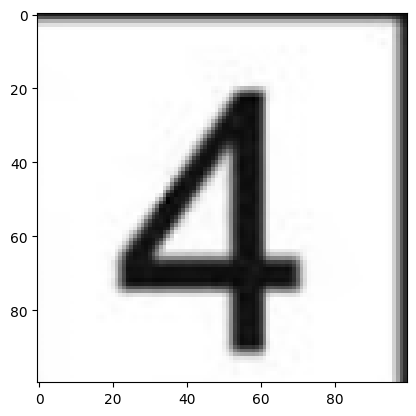

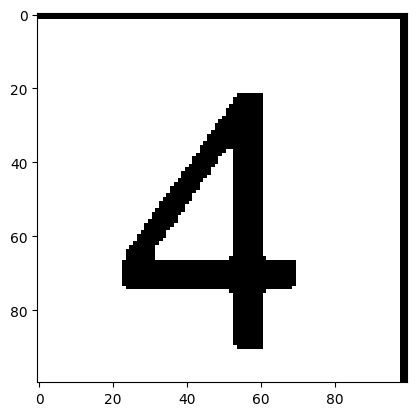

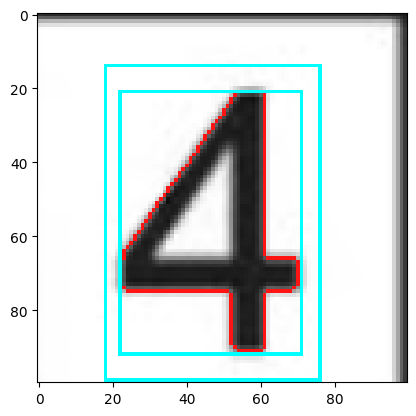

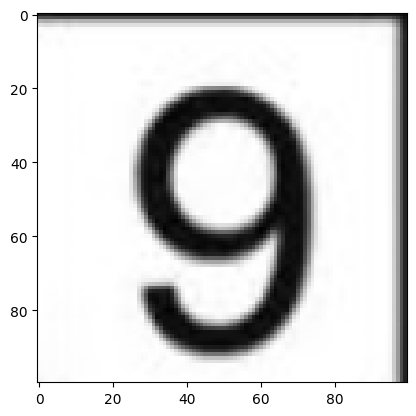

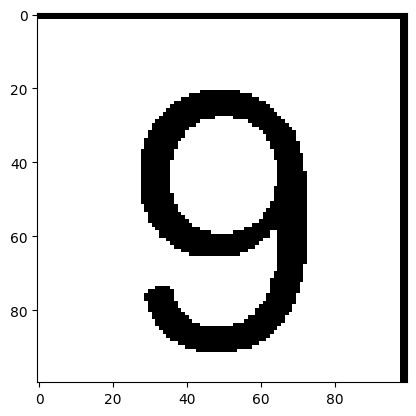

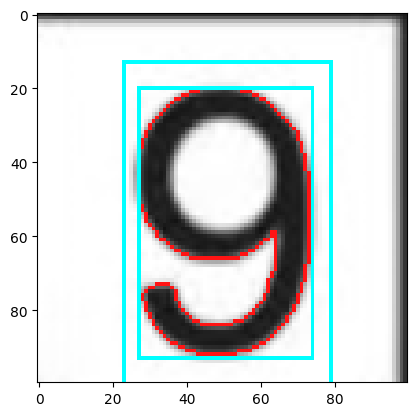

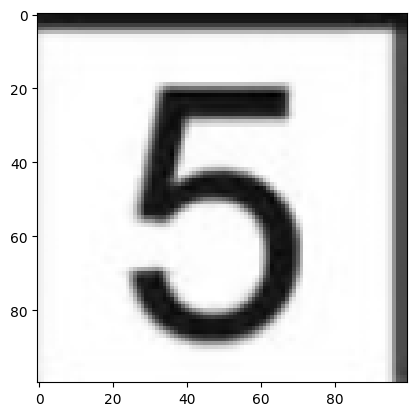

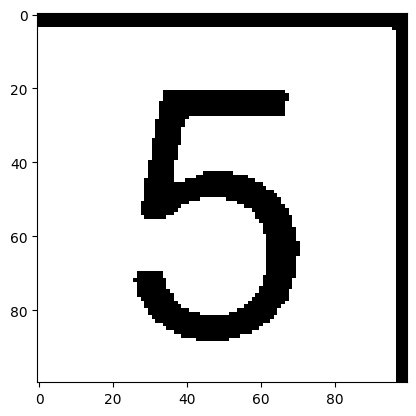

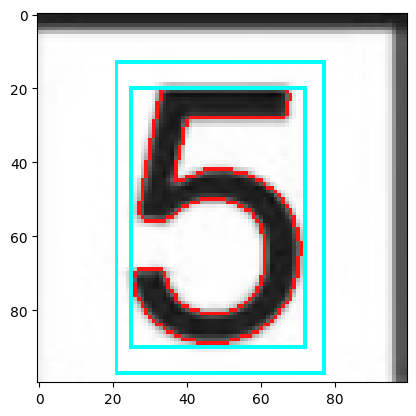

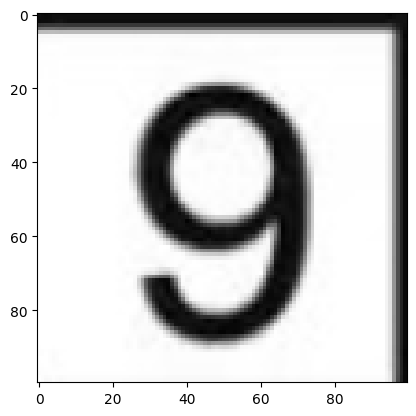

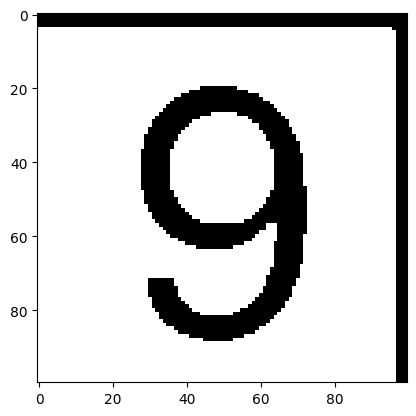

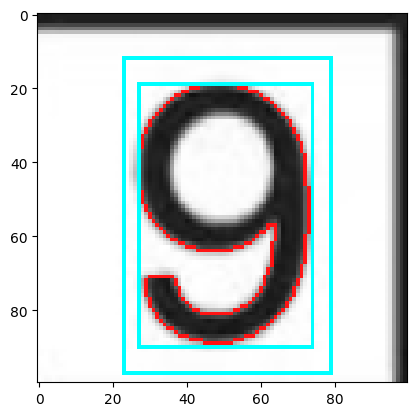

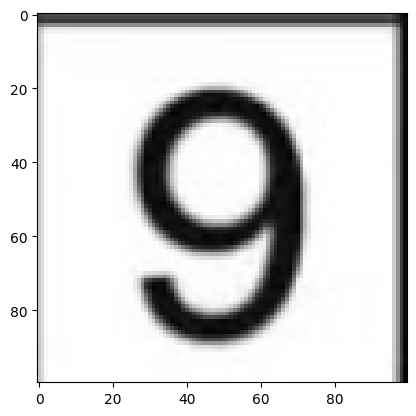

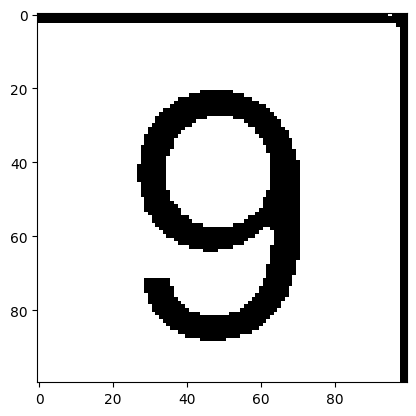

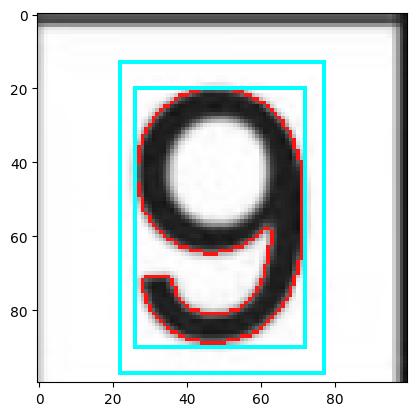

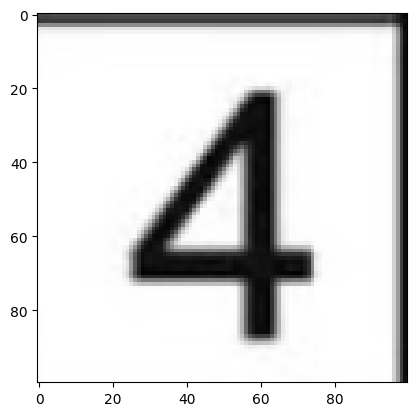

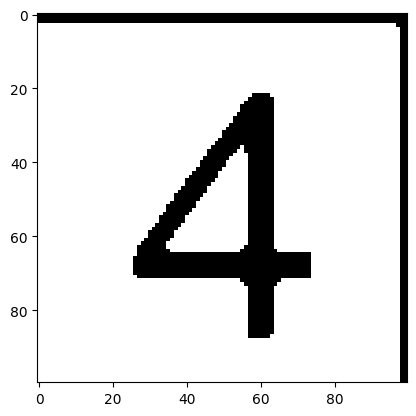

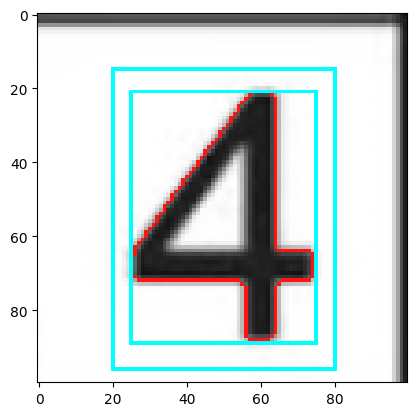

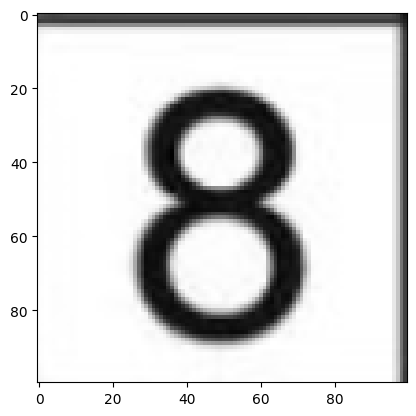

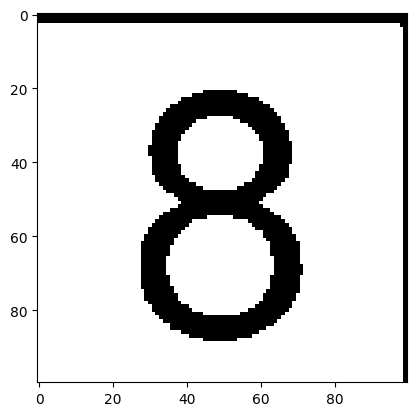

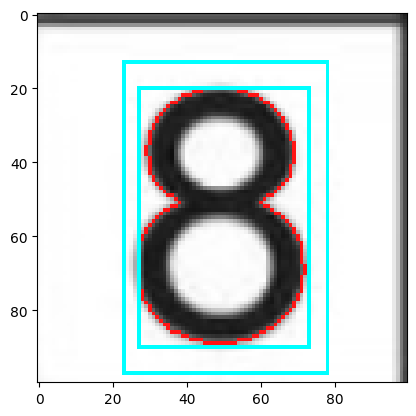

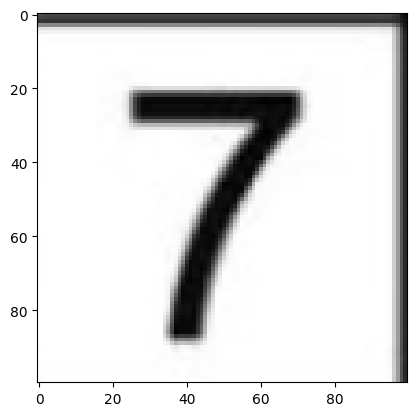

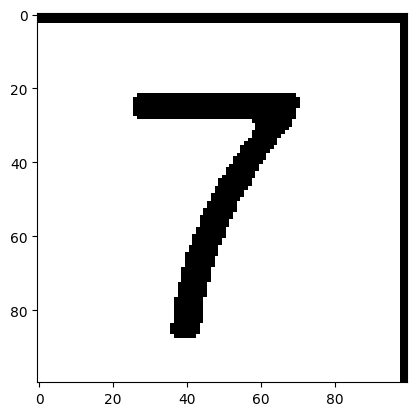

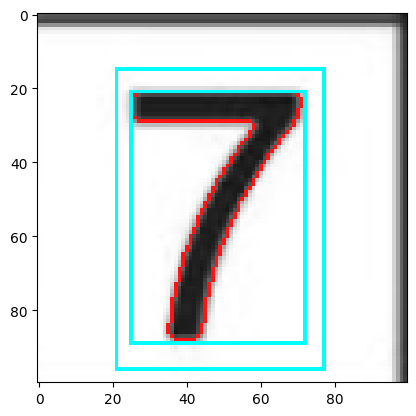

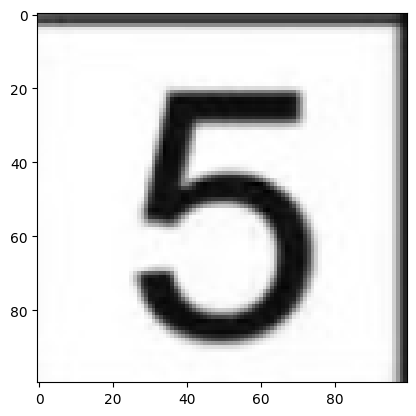

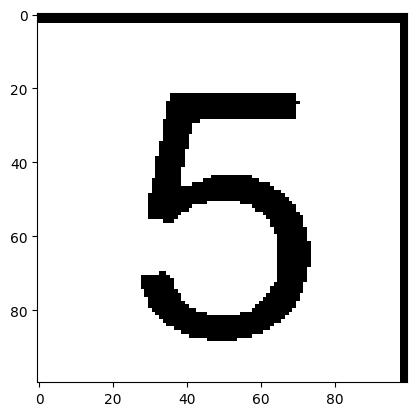

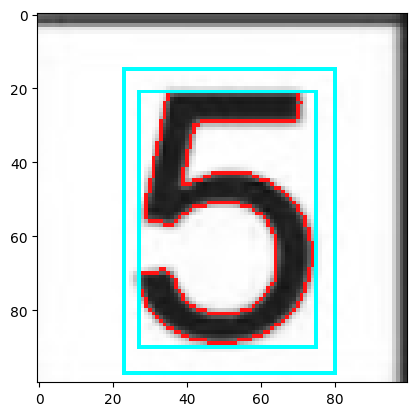

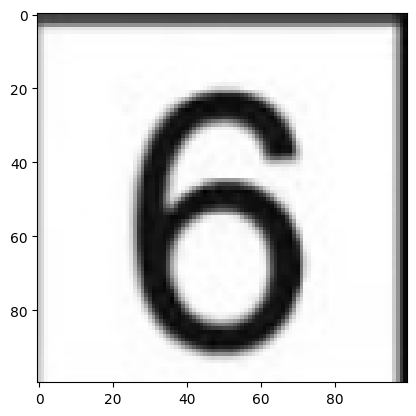

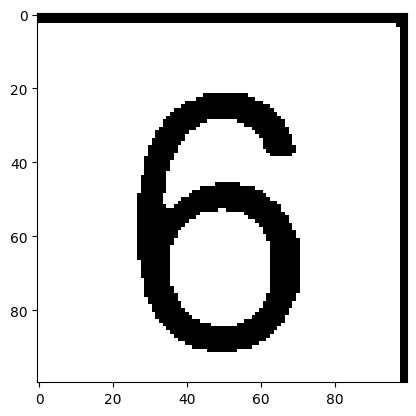

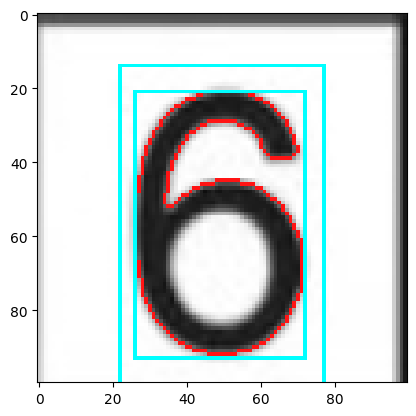

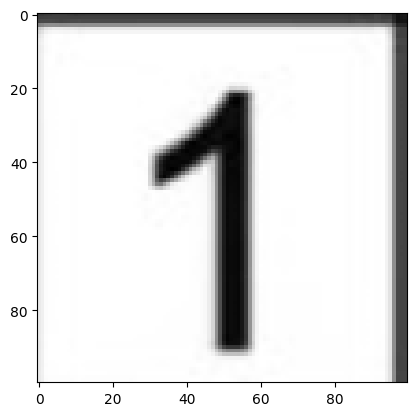

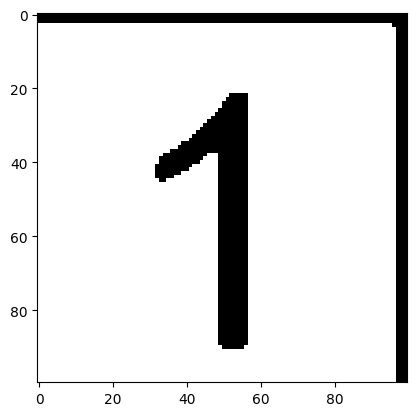

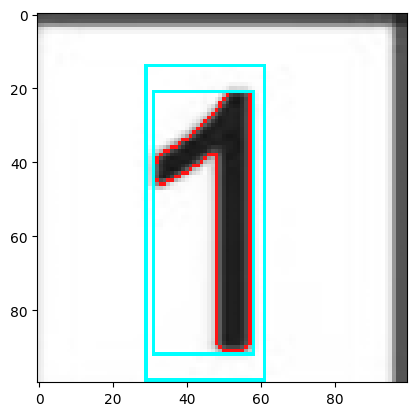

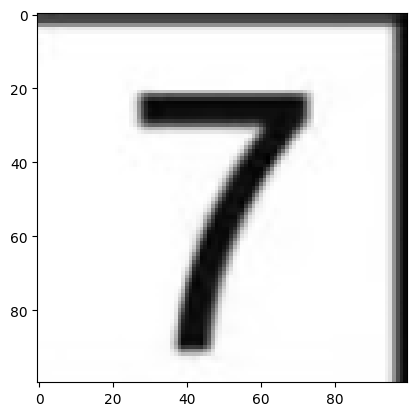

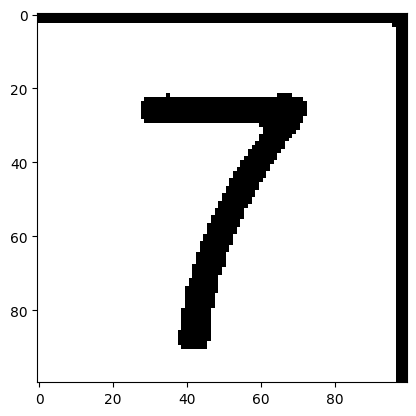

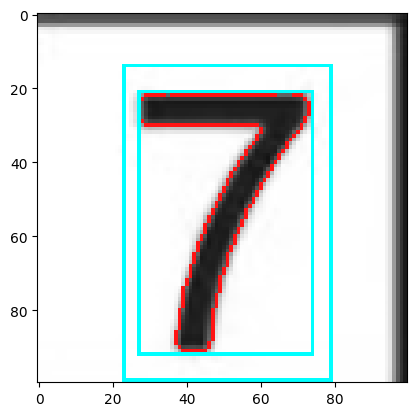

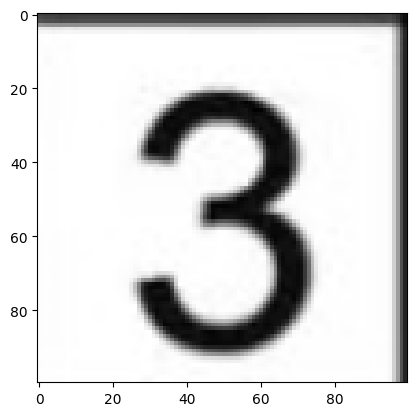

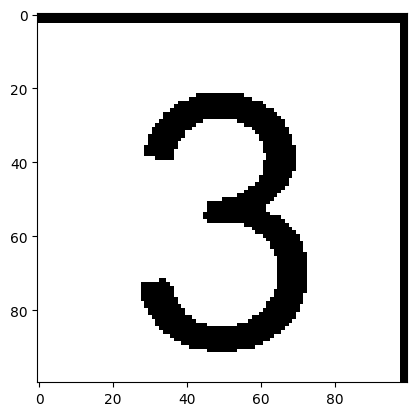

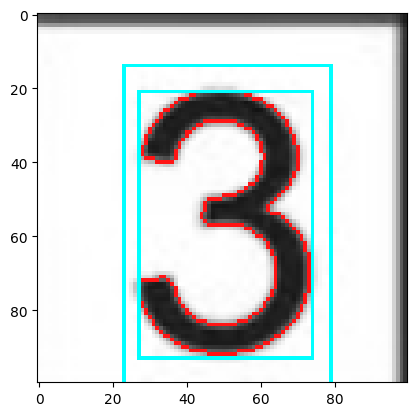

In [ ]:
# for i in numbers:
#     if i[1] == 1:
#         boundary(i[0])